In [44]:
# imports
# DS Basics
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# SKlearn Estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

# cross validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# SKlearn special plotting and outputs
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.feature_selection import mutual_info_classif
import pydotplus
import pydot


# helpers
%matplotlib inline


In [3]:
df=pd.read_csv('credit_ed4.csv') #may need to include the header=1 to remove the header if needed
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,0,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,0.396267,1.779867,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.728486,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,0.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,0.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,0.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,1.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,1.000000,3.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


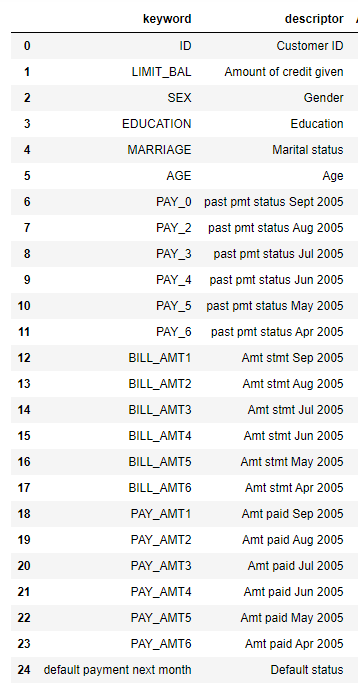

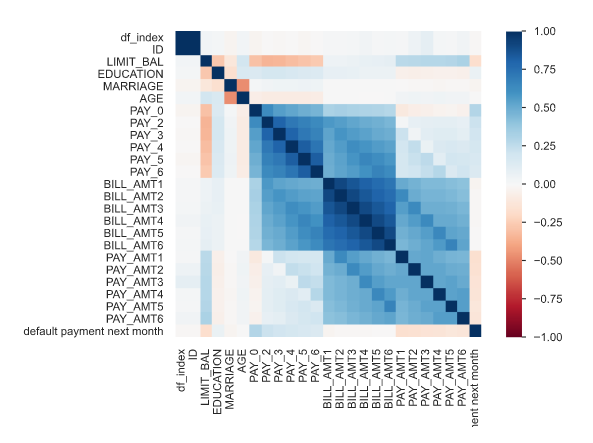

# Dependent variable= LIMIT_BAL | REGRESSION

<b> Selecting Data features & split</b>

In [5]:
#dependent variable
y1 = df['LIMIT_BAL']

In [6]:
# features
# from EDA, we want SEX, EDUCATION, MARRIAGE STATUS,AGE, 
# and the PAY_ and the PAY_AMT features. 
#See correlation matrix heatmap above for reference
X1=df.iloc[:,np.r_[2:12,18:24]]
print('Sample of selected features:')
X1.head()

Sample of selected features:


,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,2,1,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0
1,0,2,2,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000
2,0,2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000
3,0,2,1,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000
4,1,2,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679


In [12]:
# baseline model using ALL available features
#X01=df.iloc[:,np.r_[2:24]]
#print('Sample of ALL available features:')
#X01.head()


In [7]:
#Train/Test Split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .30, random_state = 123)

# Reporting number of test and split data samples
count_X1=len(X1.index)
count_X1_train=len(X1_train.index)
count_X1_test=len(X1_test.index)
print('Training set:',str(count_X1_train),' obs, test set:',str(count_X1_test),' obs, Total obs:',str(count_X1))


Training set: 21000  obs, test set: 9000  obs, Total obs: 30000


In [8]:
#Model Choice using defaults for each regressor
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

<b> Random Forest Regression Model Fitting, Tuning & Scoring</b>

In [9]:
#Model Fitting
modelRF.fit(X1_train,y1_train)
print(cross_val_score(modelRF, X1_train, y1_train,cv=3))

[0.42484797 0.42140607 0.42566523]


In [10]:
# tuning the model
modelRF_tuning = RandomForestRegressor(n_estimators=50)

modelRF_tuning.fit(X1_train,y1_train)
print(cross_val_score(modelRF_tuning, X1_train, y1_train,cv=3))


[0.42121559 0.41493732 0.41735433]


In [10]:
# test the n_estimators sensitivity

nbr_estimators=[50,75,100,125,150,200]
# List to store the metric for each parameter tuning run:
lst_R2 = []
lst_RMSE = []


for est in nbr_estimators:
    
    reg = RandomForestRegressor(n_estimators=est)
    
    reg.fit(X1_train, y1_train)
    #
    reg_rSquared = reg.score(X1_train,y1_train)
    reg_rmse = sqrt(mean_squared_error(y1_test,reg.predict(X1_test)))
    #
    lst_R2.append(reg_rSquared)
    lst_RMSE.append(reg_rmse)

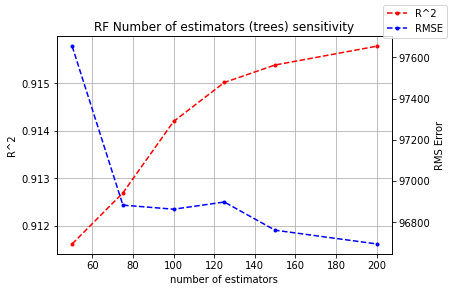

In [11]:
# here we plot the RF's R2 and RMSE sensitivity to n_estimators
fig, ax1 = plt.subplots()
ax1.plot(nbr_estimators, lst_R2,'r.--')

ax1.set(xlabel='number of estimators', ylabel='R^2',
       title='RF Number of estimators (trees) sensitivity')
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(nbr_estimators, lst_RMSE,'b.--')
ax2.set_ylabel('RMS Error')  # we already handled the x-label with ax1

fig.legend(['R^2','RMSE'])

#fig.savefig("test.png")
plt.show()

##### For the RF regressor, RMSE reaches a floor @ n_estimators=150 

In [12]:
# now let's test the max_depth sensitivity, with a fixed n_estimators=150

# List of values to try for max_depth:
max_depth_range = list(range(1, 30))

# List to store the metric for each parameter tuning run:
lst2_R2 = []
lst2_RMSE = []


for depth in max_depth_range:
    
    reg2 = RandomForestRegressor(n_estimators=150,max_depth=depth)
    
    reg2.fit(X1_train, y1_train)
    #
    reg2_rSquared = reg2.score(X1_train,y1_train)
    reg2_rmse = sqrt(mean_squared_error(y1_test,reg2.predict(X1_test)))
    #
    lst2_R2.append(reg2_rSquared)
    lst2_RMSE.append(reg2_rmse)



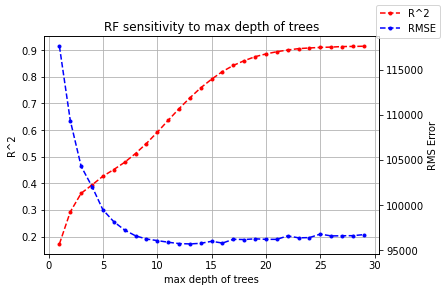

In [13]:
# here we plot the RF's R2 and RMSE sensitivity to max_depth
fig, ax1 = plt.subplots()
ax1.plot(max_depth_range, lst2_R2,'r.--')

ax1.set(xlabel='max depth of trees', ylabel='R^2',
       title='RF sensitivity to max depth of trees')
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(max_depth_range, lst2_RMSE,'b.--')
ax2.set_ylabel('RMS Error')  # we already handled the x-label with ax1

fig.legend(['R^2','RMSE'])

#fig.savefig("test.png")
plt.show()

##### For the RF regressor with n_estimators=150 , RMSE reaches a floor @ max_depth=10, but larger max_depth add significantly to the R2. For max_depth ~ 20-25, R2 reaches its ceiling. I risk OVERFITTING if going for max_depth much higher than 10-15! THIS STOPS THE RANDOM FOREST SENSITIVITY

<b> Random Forest Regression Model FINAL Fitting & Scoring</b>

In [14]:
modelRF_TUNED = RandomForestRegressor(n_estimators=150,max_depth=15)
modelRF_TUNED.fit(X1_train,y1_train)
print(cross_val_score(modelRF_TUNED, X1_train, y1_train,cv=3))

[0.43628269 0.43727999 0.43547113]


<b> Support Vector Regression Model Fitting, Tuning & Scoring</b>

In [16]:
#Model Fitting
modelSVR.fit(X1_train,y1_train)
print(cross_val_score(modelSVR, X1_train, y1_train,cv=3)) 


[-0.05243502 -0.03955723 -0.03790728]


In [21]:
# tuning the model
# test epsilon-tube sensitivity, default eps=0.1

eps_range=[0.1,1,10,100,1000,10000]
# List to store the metric for each parameter tuning run:
lst_SVR_R2 = []
lst_SVR_RMSE = []


for eps in eps_range:
    
    SVR_reg=SVR(epsilon=eps)
    
    SVR_reg.fit(X1_train, y1_train)
    #
    SVR_reg_rSquared = SVR_reg.score(X1_train,y1_train)
    SVR_reg_rmse = sqrt(mean_squared_error(y1_test,SVR_reg.predict(X1_test)))
    #
    lst_SVR_R2.append(SVR_reg_rSquared)
    lst_SVR_RMSE.append(SVR_reg_rmse)

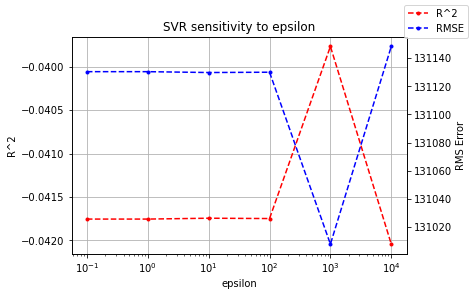

In [22]:
# here we plot the SVR's R2 and RMSE sensitivity to epsilon
fig, ax1 = plt.subplots()
ax1.plot(eps_range, lst_SVR_R2,'r.--')

ax1.set(xlabel='epsilon', ylabel='R^2',
       title='SVR sensitivity to epsilon')
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(eps_range, lst_SVR_RMSE,'b.--')
ax2.set_ylabel('RMS Error')  # we already handled the x-label with ax1

ax1.semilogx()

fig.legend(['R^2','RMSE'])

#fig.savefig("test.png")
plt.show()

##### For the SV regressor, probably epsilon=1000. However, there are not significant gains on the metrics. Let's make epsilon=1,000 and play with the sensitivity to C (deviation from the margin or tolerance of points outside the epsilon tube

In [25]:
# tuning the model
# test C (tolerance of points outside epsilon tube)sensitivity, epsilon=1,000

C_range=[1,10,100,1000,10000,100000]
# List to store the metric for each parameter tuning run:
lst2_SVR_R2 = []
lst2_SVR_RMSE = []


for cc in C_range:
    
    SVR_reg2=SVR(epsilon=1000,C=cc)
    
    SVR_reg2.fit(X1_train, y1_train)
    #
    SVR_reg2_rSquared = SVR_reg2.score(X1_train,y1_train)
    SVR_reg2_rmse = sqrt(mean_squared_error(y1_test,SVR_reg2.predict(X1_test)))
    #
    lst2_SVR_R2.append(SVR_reg2_rSquared)
    lst2_SVR_RMSE.append(SVR_reg2_rmse)

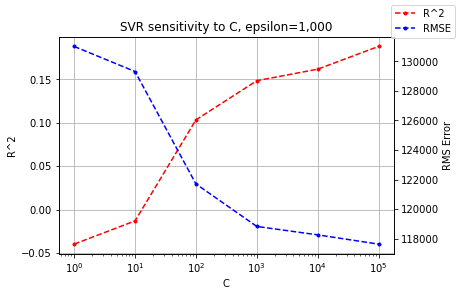

In [26]:
# here we plot the SVR's R2 and RMSE sensitivity to C, epsilon=1,000
fig, ax1 = plt.subplots()
ax1.plot(C_range, lst2_SVR_R2,'r.--')

ax1.set(xlabel='C', ylabel='R^2',
       title='SVR sensitivity to C, epsilon=1,000')
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(C_range, lst2_SVR_RMSE,'b.--')
ax2.set_ylabel('RMS Error')  # we already handled the x-label with ax1

ax1.semilogx()

fig.legend(['R^2','RMSE'])

#fig.savefig("test.png")
plt.show()

##### For the SV regressor with epsilon=1,000 and increasing C, RMSE keeps going down and R2 going up, without reaching the floor and ceiling respectively. In the case of R2, it barely surpassed the 0.15 value. I'd assume that a much larger C would be required, at the expense of much higher computational cost. Just for comparison, I'll run the "tuned" SVR model with epsilon=1,000 and C=100,000 THIS STOPS THE SVR SENSITIVITY

<b> Support Vector Regression Model FINAL Fitting & Scoring</b>

In [27]:
#Model Fitting

modelSVR_TUNED = SVR(epsilon=1000,C=100000)

modelSVR_TUNED.fit(X1_train,y1_train)
print(cross_val_score(modelSVR, X1_train, y1_train,cv=3)) 


[-0.05243502 -0.03955723 -0.03790728]


<b> Linear Regression Model Fitting, Tuning & Scoring</b>

In [28]:
#Model Fitting
modelLR.fit(X1_train,y1_train)
print(cross_val_score(modelLR, X1_train, y1_train,cv=3)) 

[0.28283495 0.22966814 0.28470091]


In [33]:
# Tuning the model
#modelLR_tuning=LinearRegression(normalize=True)
#modelLR_tuning=LinearRegression(n_jobs=50)

# test n_jobs

njobs_range=[1,10,100,1000]
# List to store the metric for each parameter tuning run:
lst_LR_R2 = []
lst_LR_RMSE = []


for n in njobs_range:
    
    LR_reg=LinearRegression(n_jobs=n)
    
    LR_reg.fit(X1_train, y1_train)
    #
    LR_reg_rSquared = LR_reg.score(X1_train,y1_train)
    LR_reg_rmse = sqrt(mean_squared_error(y1_test,LR_reg.predict(X1_test)))
    #
    lst_LR_R2.append(LR_reg_rSquared)
    lst_LR_RMSE.append(LR_reg_rmse)


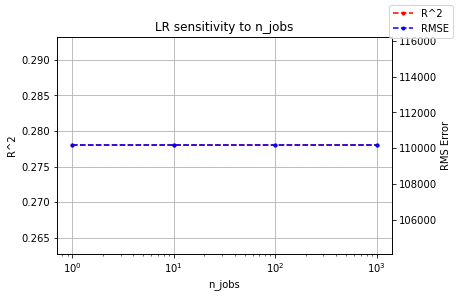

In [34]:
# here we plot the LR's R2 and RMSE sensitivity to n_jobs
fig, ax1 = plt.subplots()
ax1.plot(njobs_range, lst_LR_R2,'r.--')

ax1.set(xlabel='n_jobs', ylabel='R^2',
       title='LR sensitivity to n_jobs')
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(njobs_range, lst_LR_RMSE,'b.--')
ax2.set_ylabel('RMS Error')  # we already handled the x-label with ax1

ax1.semilogx()

fig.legend(['R^2','RMSE'])

#fig.savefig("test.png")
plt.show()

### all the parameters tested do not improve the metrics. Defaults provide the "best"

<b> Linear Regression Model FINAL Fitting & Scoring</b>

In [35]:
#Model Fitting

modelLR_TUNED = LinearRegression()

modelLR_TUNED.fit(X1_train,y1_train)
print(cross_val_score(modelLR_TUNED, X1_train, y1_train,cv=3)) 

[0.28283495 0.22966814 0.28470091]


<b> Trained Model(s) Performance using DEFAULTS</b>

In [36]:
# RF Model Performance
RF_rSquared = modelRF.score(X1_train,y1_train)
RF_rmse = sqrt(mean_squared_error(y1_test,modelRF.predict(X1_test)))

# SVR Model Performance
SVR_rSquared = modelSVR.score(X1_train,y1_train)
SVR_rmse = sqrt(mean_squared_error(y1_test,modelSVR.predict(X1_test)))

# LR Model Performance
LR_rSquared = modelLR.score(X1_train,y1_train)
LR_rmse = sqrt(mean_squared_error(y1_test,modelLR.predict(X1_test)))


In [37]:
# build DataFrame for ease of reporting rSquareds and RMS errors
# The lower the rmse, the better
# the higher R2, the better

Trained_Models_Perfm=pd.DataFrame({"Regression Model":['Random Forest','Support Vector','Linear'],
                                  "R^2":[RF_rSquared,SVR_rSquared,LR_rSquared],
                                 "RMS Error":[RF_rmse,SVR_rmse,LR_rmse]},
                                 index=[1,2,3])
Trained_Models_Perfm

,Regression Model,R^2,RMS Error
1,Random Forest,0.914362,96971.776268
2,Support Vector,-0.041755,131130.418993
3,Linear,0.277981,110162.135946


In [24]:
# this is another form of comparing the models' performance based on cv
# it yields the results of my implementation above
# To run it, uncomment all the lines below

# algosReg=[]
# algosReg.append(('Random Forest Regression',RandomForestRegressor()))
# algosReg.append(('Support Vector Regression',SVR()))
# algosReg.append(('Linear Regression',LinearRegression()))

# # regression
# results=[]
# names=[]

# for name, model in algosReg:
#     result=cross_val_score(model,X1_train,y1_train,cv=3,scoring='r2')
#     names.append(name)
#     results.append(result)

# results

<b> Trained Model(s) Performance AFTER TUNING</b>

In [39]:
# RF Model Performance
RF_TUNED_rSquared = modelRF_TUNED.score(X1_train,y1_train)
RF_TUNED_rmse = sqrt(mean_squared_error(y1_test,modelRF_TUNED.predict(X1_test)))

# SVR Model Performance
SVR_TUNED_rSquared = modelSVR_TUNED.score(X1_train,y1_train)
SVR_TUNED_rmse = sqrt(mean_squared_error(y1_test,modelSVR_TUNED.predict(X1_test)))

# LR Model Performance
LR_TUNED_rSquared = modelLR_TUNED.score(X1_train,y1_train)
LR_TUNED_rmse = sqrt(mean_squared_error(y1_test,modelLR_TUNED.predict(X1_test)))

In [40]:
# build DataFrame for ease of reporting rSquareds and RMS errors
# The lower the rmse, the better
# the higher R2, the better

Trained_Models_Perfm_TUNED=pd.DataFrame({"Regression Model":['Random Forest','Support Vector','Linear'],
                                  "R^2":[RF_TUNED_rSquared,SVR_TUNED_rSquared,LR_TUNED_rSquared],
                                 "RMS Error":[RF_TUNED_rmse,SVR_TUNED_rmse,LR_TUNED_rmse]},
                                 index=[1,2,3])
Trained_Models_Perfm_TUNED

,Regression Model,R^2,RMS Error
1,Random Forest,0.790414,95753.104064
2,Support Vector,0.187880,117636.361109
3,Linear,0.277981,110162.135946


## Comments on comparison of models (defaults vs tuned):

### 1.- Random Forest: After tuning the RMSE reduction is negible at the expense of a much lower R2.

### 2.- SVR: tuned model shows a considerable improvement with respect of defaults, however it's much computationally expensive.

### 3.- LR: for the current problem, LR is practically unsensitive to the main parameters tested.

## DECISION: Use the Random Forest Regressor using the default settings.

<b> Prediction making & assessment</b>

In [82]:
#Make Predictions
pred1 = modelRF.predict(X1_test)
predRsquared1 = r2_score(y1_test,pred1)
rmse1 = sqrt(mean_squared_error(y1_test, pred1))
print('R Squared: %.3f' % predRsquared1)
print('RMSE: %.3f' % rmse1)

R Squared: 0.432
RMSE: 96971.776


Text(0.5, 0.98, 'Credit Line (LIMIT_BAL) Random Forest Predictions vs Actual')

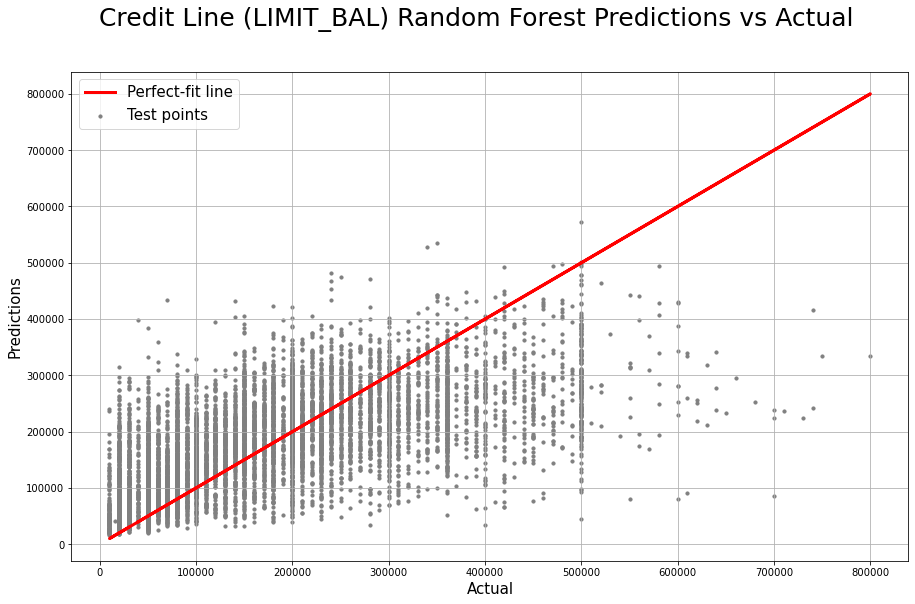

In [89]:
# VISUALIZATION-based assessment: 
# plotting predictions vs actual LIMIT_BAL values

#
fig,ax=plt.subplots(figsize=(15,9))
#fig.subplots_adjust(hspace=0.8,wspace=0.25)
#

ax.scatter(y1_test, pred1,s=10,c='grey',label='Test points')
ax.set_xlabel('Actual',fontsize=15)
ax.set_ylabel('Predictions',fontsize=15)

ax.grid()

# adding a perfect fit line for ease of analysis
ax.plot(y1_test,y1_test,linewidth=3,color='red',label='Perfect-fit line')
#
ax.legend(fontsize=15)

#
fig.suptitle('Credit Line (LIMIT_BAL) Random Forest Predictions vs Actual', fontsize=25)








## Despite the efforts on obtaining a well-calibrated model, there model does not seem reliable on making predictions of LIMIT_BAL. As seen on the figure above, there is still plenty of dispersion in the predictions for a common actual value, AND the model seems to have an overall bias towards under-predicting values as the actual values increase.

## from the plot, it can also be observed that the actual value points are not "randomly" dispersed along the x-axis, but rather having a "categorical" or "discrete" appearance. Probably a classification, rather than a regression approach may be more suitable

# CLASSIFICATION APPROACH FOR LIMIT-BAL

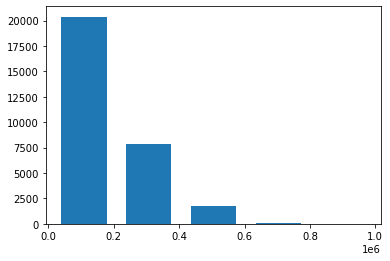

In [11]:
# First, discretize/bin the dependent variable
#dependent variable y1 = df['LIMIT_BAL']

n_bins=5
hist, bins = np.histogram(y1, bins=n_bins)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()



In [12]:
y1.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [13]:
# using Pandas cut to bin, using "round" number ranges to create the bins
#until the new histogram shows a much more balanced dataset than the one shown above

y2=pd.cut(x=y1,bins=[9999,50000,140000,240000,1000001],labels=[1, 2, 3,4])


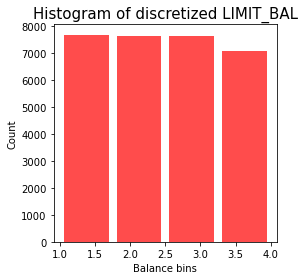

In [14]:
n_bins=4


fig,axs=plt.subplots(figsize=(4,4))
fig.subplots_adjust(hspace=0.35,wspace=0.25)

axs.hist(y2, bins=n_bins, color='r', alpha=0.7, rwidth=0.85)
axs.set_title('Histogram of discretized LIMIT_BAL',fontsize=15)
axs.set_xlabel('Balance bins',fontsize=10)
axs.set_ylabel('Count',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### In summary, I have discretized LIMIT_BAL using four (4) bins, defined as follows:

### 1: USD 9,999-50,000
### 2: USD 50,000-140,000
### 3: USD 140,000-240,000
### 4: USD 240,000-1,000,001

In [15]:
# Now, I need to redo the data splitting
#Train/Test Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y2, test_size = .30, random_state = 123)

# Reporting number of test and split data samples
count_X1=len(X1.index)
count_X2_train=len(X2_train.index)
count_X2_test=len(X2_test.index)
print('Training set:',str(count_X2_train),' obs, test set:',str(count_X2_test),' obs, Total obs:',str(count_X1))




Training set: 21000  obs, test set: 9000  obs, Total obs: 30000


In [16]:
# Instantiate the algorithm and build the Decision Tree model
algo_DTC=DecisionTreeClassifier()
model_DTC=algo_DTC.fit(X2_train,y2_train)

In [17]:
# Make predictions and quick check for metrics

pred_DTC=model_DTC.predict(X2_test)

print(classification_report(y2_test, pred_DTC))

              precision    recall  f1-score   support

           1       0.60      0.57      0.58      2301
           2       0.39      0.42      0.40      2252
           3       0.36      0.34      0.35      2361
           4       0.43      0.44      0.44      2086

    accuracy                           0.44      9000
   macro avg       0.44      0.44      0.44      9000
weighted avg       0.44      0.44      0.44      9000



In [18]:
model_DTC.get_depth()

40

In [19]:
# Let's test the DTC sensitivity to max_depth

max_depth_range = list(range(1, 45))
# List to store the accuracy for each value of max_depth:
accuracy = []
prec = []
rcall = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X2_train, y2_train)
    score = clf.score(X2_test, y2_test)
                              
    
    accuracy.append(score)




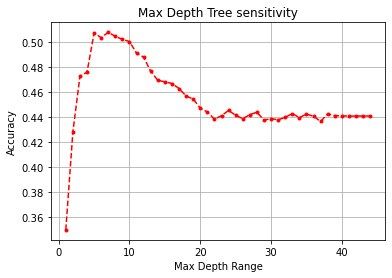

In [20]:
fig, ax = plt.subplots()
ax.plot(max_depth_range, accuracy,'r.--')

ax.set(xlabel='Max Depth Range', ylabel='Accuracy',
       title='Max Depth Tree sensitivity')
ax.grid()


#fig.savefig("test.png")
plt.show()


### letting the decision tree going unconstrained to a large depth (41) does not add accuracy at all, actually we have diminishing ROI. We should do just fine with a max_depth<10

In [21]:
# let's re-run DTC, but using max_depth=5
algo_DTC_TUNED=DecisionTreeClassifier(max_depth=5)
model_DTC_TUNED=algo_DTC_TUNED.fit(X2_train,y2_train)


In [22]:
# Make predictions and quick check for metrics

pred_DTC_TUNED=model_DTC_TUNED.predict(X2_test)

print(classification_report(y2_test, pred_DTC_TUNED))

              precision    recall  f1-score   support

           1       0.60      0.72      0.66      2301
           2       0.45      0.46      0.46      2252
           3       0.43      0.34      0.38      2361
           4       0.51      0.52      0.51      2086

    accuracy                           0.51      9000
   macro avg       0.50      0.51      0.50      9000
weighted avg       0.50      0.51      0.50      9000



[Text(697.5, 996.6, 'PAY_AMT2 <= 4520.5\ngini = 0.75\nsamples = 21000\nvalue = [5375, 5362, 5282, 4981]\nclass = 10k-50k'),
 Text(348.75, 815.4000000000001, 'PAY_2 <= -0.5\ngini = 0.735\nsamples = 15136\nvalue = [4994, 4300, 3315, 2527]\nclass = 10k-50k'),
 Text(174.375, 634.2, 'AGE <= 26.5\ngini = 0.717\nsamples = 5015\nvalue = [652, 983, 1805, 1575]\nclass = 140k-240k'),
 Text(87.1875, 453.0, 'AGE <= 24.5\ngini = 0.688\nsamples = 599\nvalue = [237, 191, 134, 37]\nclass = 10k-50k'),
 Text(43.59375, 271.79999999999995, 'AGE <= 22.5\ngini = 0.576\nsamples = 283\nvalue = [156, 93, 31, 3]\nclass = 10k-50k'),
 Text(21.796875, 90.59999999999991, 'gini = 0.282\nsamples = 47\nvalue = [39, 8, 0, 0]\nclass = 10k-50k'),
 Text(65.390625, 90.59999999999991, 'gini = 0.607\nsamples = 236\nvalue = [117, 85, 31, 3]\nclass = 10k-50k'),
 Text(130.78125, 271.79999999999995, 'SEX <= 0.5\ngini = 0.72\nsamples = 316\nvalue = [81, 98, 103, 34]\nclass = 140k-240k'),
 Text(108.984375, 90.59999999999991, 'gini 

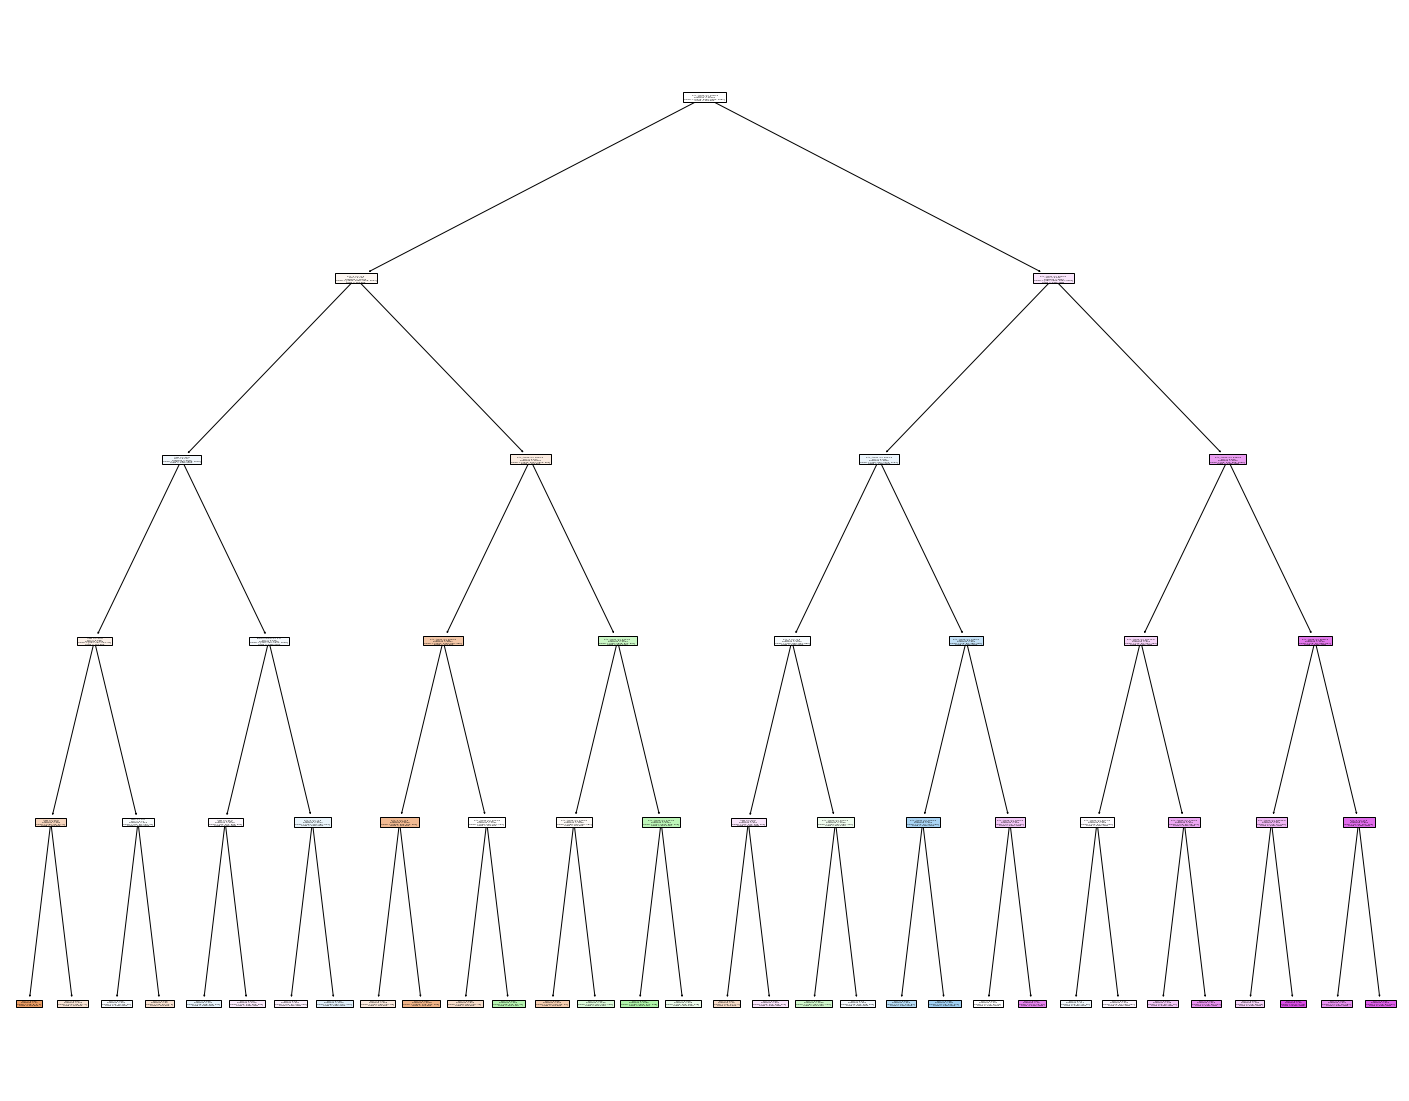

In [33]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model_DTC_TUNED, feature_names=X1.columns,class_names=['10k-50k','50k-140k', '140k-240k','240k-1MM'], filled=True)
#fig.savefig("DTC_LIMIT_BAL.tiff", format='tiff', dpi=200)

In [48]:
# exporting the DT as a dot file and later as a image file, for ease of interpretation
tree.export_graphviz(model_DTC_TUNED, out_file="dot_data.dot",feature_names=X1.columns)

(graph,) = pydot.graph_from_dot_file('dot_data.dot')
graph.write_png('DTC_LIMIT_BAL_dot.tiff')


In [194]:
# DTC_y2_feat_importance=model_DTC_TUNED.feature_importances_
# DTC_y2_feat_importance



In [195]:
# X2_train.shape

In [196]:
# importance=model_DTC_TUNED.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()


In [125]:
# Calculate Confusion Matrix for the Classifier
cm_DTC_y2=confusion_matrix(y2_test, pred_DTC_TUNED)
print(cm_DTC_y2)

[[1652  384  187   78]
 [ 628 1039  380  205]
 [ 289  526  792  754]
 [ 169  337  498 1082]]


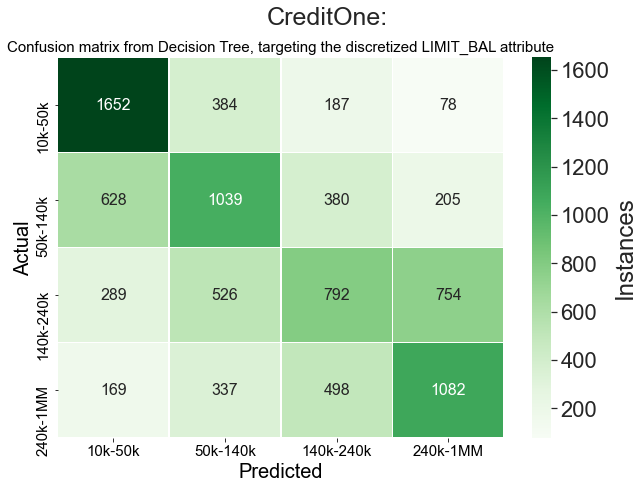

In [126]:
# Plotting the confusion matrix

df_cm_DTC_y2 = pd.DataFrame(cm_DTC_y2, range(4), range(4))

fig, ax = plt.subplots(figsize=(10, 7))
fig.subplots_adjust(hspace=0.45,wspace=0.45)

y2_lgnd=['10k-50k','50k-140k', '140k-240k','240k-1MM']


sns.set(font_scale=2) # for label size

sns.heatmap(df_cm_DTC_y2, xticklabels=y2_lgnd, yticklabels=y2_lgnd, annot=True,fmt="d", annot_kws={"size": 16},cmap="Greens",linewidths=.5,cbar_kws={'label': 'Instances'}) # font size

ax.set_xlabel('Predicted',fontsize=20)
ax.set_ylabel('Actual',fontsize=20)
plt.suptitle('CreditOne:',fontsize=25)
plt.title('Confusion matrix from Decision Tree, targeting the discretized LIMIT_BAL attribute',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.show()

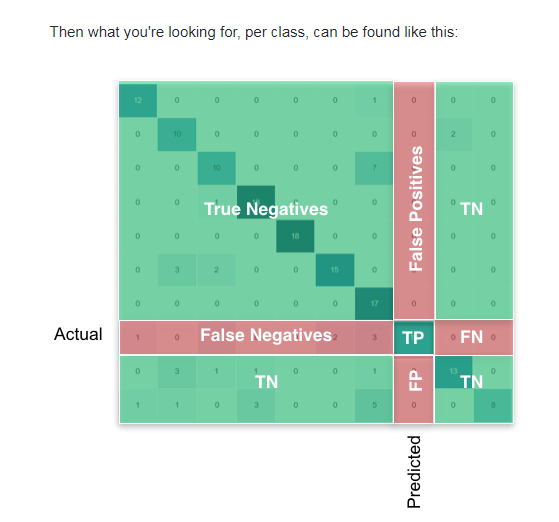

In [128]:
# # Confusion matrix QC plot
# clf=model_DTC_TUNED

# plot_confusion_matrix(clf,X2_test,y2_test)
# plt.show

In [138]:
# Reporting: from the Confusion matrix, get additional metrics
df_cm=df_cm_DTC_y2
y2_lgnd=['10k-50k','50k-140k', '140k-240k','240k-1MM']

FP = df_cm.sum(axis=0) - np.diag(df_cm)  
FN = df_cm.sum(axis=1) - np.diag(df_cm)
TP = np.diag(df_cm)
TN = df_cm.values.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


# Generate a dummy DataFrame that summarizes/reports


df_DTC_TUNED_report=pd.DataFrame({"LIMIT_BAL range":['USD 10k-50k','USD 50k-140k','USD 140k-240k','USD 240k-1MM'],
                                  "Overall Accuracy":ACC,
                                 "True Positives":TP,"False Positives":FP,"True Negatives":TN,"False Negatives":FN},
                                 index=[0,1,2,3])

df_DTC_TUNED_report

,LIMIT_BAL range,Overall Accuracy,True Positives,False Positives,True Negatives,False Negatives
0,USD 10k-50k,0.807222,1652,1086,5613,649
1,USD 50k-140k,0.726667,1039,1247,5501,1213
2,USD 140k-240k,0.707333,792,1065,5574,1569
3,USD 240k-1MM,0.773222,1082,1037,5877,1004


In [141]:
# Generate a similar report, but reporting as % of total test instances

total_inst=len(y2_test)

TPp=100*TP/total_inst
FPp=100*FP/total_inst
TNp=100*TN/total_inst
FNp=100*FN/total_inst

df_DTC_TUNED_report_perc=pd.DataFrame({"LIMIT_BAL range":['USD 10k-50k','USD 50k-140k','USD 140k-240k','USD 240k-1MM'],
                                  "Overall Accuracy":ACC,
                                 "True Positives %":TPp,"False Positives %":FPp,"True Negatives %":TNp,"False Negatives %":FNp},
                                 index=[0,1,2,3])

df_DTC_TUNED_report_perc

,LIMIT_BAL range,Overall Accuracy,True Positives %,False Positives %,True Negatives %,False Negatives %
0,USD 10k-50k,0.807222,18.355556,12.066667,62.366667,7.211111
1,USD 50k-140k,0.726667,11.544444,13.855556,61.122222,13.477778
2,USD 140k-240k,0.707333,8.800000,11.833333,61.933333,17.433333
3,USD 240k-1MM,0.773222,12.022222,11.522222,65.300000,11.155556


## The Decision Tree Classifier does a better job at triaging the amount for the line of credit than the regression approach. The model provides a reasonable accuracy, especially for the end-member classess. The model allows a first-order discarding of credit amount ranges to be approved to the client, based on the consistent large amount of True Negatives for each class.

## The lack of an *Income* variable may be a major factor on the current lack of across-the-board robustness of both regression and classifier models.

# Dependent variable= DEFAULT STATUS | CLASSIFICATION

### now, assuming that a client has been approved for a given amount of credit, the task is to assess how likely such client to default on the credit balance it has. Since the *default status* variable is discrete binary (either default or not), this must be approach as a classification problem.

<b> Selecting Data features & split</b>

In [49]:
#dependent variable
y3 = df['default payment next month']

In [50]:
# features
#from EDA, we want LIMIT_BAL, the PAY? group, and the PAY_AMT? group. 
#See correlation matrix heatmap above for reference
X3=df.iloc[:,[1,6,7,8,9,10,11,18,19,20,21,22,23]]
print('Sample of selected features:')
X3.head()

Sample of selected features:


,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,-1,-1,-2,-2,0,689,0,0,0,0
1,120000,-1,2,0,0,0,2,0,1000,1000,1000,0,2000
2,90000,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000
3,50000,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000
4,50000,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679


In [51]:
#Train/Test Split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = .30, random_state = 123)

# Reporting number of test and split data samples
count_X3=len(X3.index)
count_X3_train=len(X3_train.index)
count_X3_test=len(X3_test.index)
print('Training set:',str(count_X3_train),' obs, test set:',str(count_X3_test),' obs, Total obs:',str(count_X3))


Training set: 21000  obs, test set: 9000  obs, Total obs: 30000


### No default=0, default=1

In [52]:
#Model Choice

algoDTC_y3=DecisionTreeClassifier()
modelDTC_y3=algoDTC_y3.fit(X3_train,y3_train)

In [53]:
# Make predictions and quick check for metrics

pred_DTC_y3=modelDTC_y3.predict(X3_test)
print(classification_report(y3_test, pred_DTC_y3))


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7052
           1       0.37      0.40      0.39      1948

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.60      9000
weighted avg       0.73      0.72      0.73      9000



In [54]:
modelDTC_y3.get_depth()

46

In [154]:
# Let's test the DTC sensitivity to max_depth

max_depth_range = list(range(1, 60))
# List to store the accuracy for each value of max_depth:
accuracy3 = []
#prec = []
#rcall = []

for depth in max_depth_range:
    
    clf3 = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf3.fit(X3_train, y3_train)
    score = clf3.score(X3_test, y3_test)                             
    
    accuracy3.append(score)



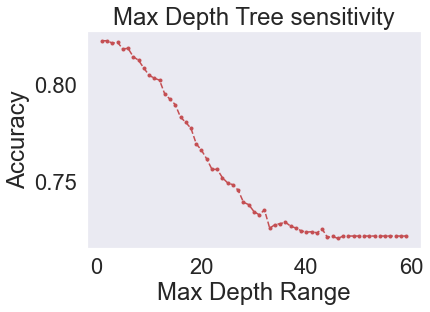

In [155]:
fig, ax = plt.subplots()
ax.plot(max_depth_range, accuracy3,'r.--')

ax.set(xlabel='Max Depth Range', ylabel='Accuracy',
       title='Max Depth Tree sensitivity')
ax.grid()


#fig.savefig("test.png")
plt.show()

### The decision tree accuracy reaches a floor at max_depth ~40. Perhaps we can tune the model by pre-pruning the tree to max_depth=4, which would reduce computational time and keep overall accuracy above 80%

In [55]:
# Tuning model

algoDTC_y3_TUNED=DecisionTreeClassifier(max_depth=4)
modelDTC_y3_TUNED=algoDTC_y3_TUNED.fit(X3_train,y3_train)

In [56]:
# Make predictions and quick check for metrics

pred_DTC_y3_TUNED=modelDTC_y3_TUNED.predict(X3_test)
print(classification_report(y3_test, pred_DTC_y3_TUNED))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7052
           1       0.65      0.37      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



### The DT tuning clearly improved the precision with respect of the default parameters, especially on predicting the *default* class

In [58]:
# exporting the DT as a dot file and later as a image file, for ease of interpretation
tree.export_graphviz(modelDTC_y3_TUNED, out_file="dot_data3.dot",feature_names=X3.columns)

(graph,) = pydot.graph_from_dot_file('dot_data3.dot')
graph.write_png('DTC_DEFAULT_dot.tiff')

In [158]:
# Calculate Confusion Matrix for the Classifier
cm_DTC_y3=confusion_matrix(y3_test, pred_DTC_y3_TUNED)
print(cm_DTC_y3)

[[6670  382]
 [1223  725]]


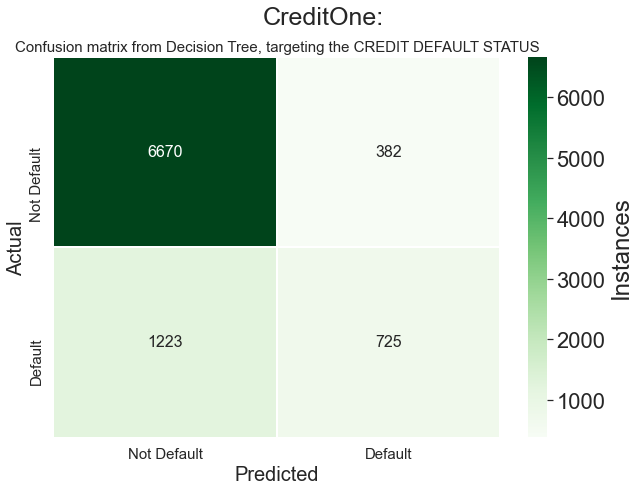

In [159]:
# Plotting the confusion matrix

df_cm_DTC_y3 = pd.DataFrame(cm_DTC_y3, range(2), range(2))

fig, ax = plt.subplots(figsize=(10, 7))
fig.subplots_adjust(hspace=0.45,wspace=0.45)

y3_lgnd=['Not Default','Default']


sns.set(font_scale=2) # for label size

sns.heatmap(df_cm_DTC_y3, xticklabels=y3_lgnd, yticklabels=y3_lgnd, annot=True,fmt="d", annot_kws={"size": 16},cmap="Greens",linewidths=.5,cbar_kws={'label': 'Instances'}) # font size

ax.set_xlabel('Predicted',fontsize=20)
ax.set_ylabel('Actual',fontsize=20)
plt.suptitle('CreditOne:',fontsize=25)
plt.title('Confusion matrix from Decision Tree, targeting the CREDIT DEFAULT STATUS',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.show()

In [161]:
# # Confusion matrix QC plot
# clf3=modelDTC_y3_TUNED

# plot_confusion_matrix(clf3,X3_test,y3_test)
# plt.show

In [162]:
# Reporting: from the Confusion matrix, get additional metrics
df_cm=df_cm_DTC_y3
y3_lgnd=['Not Default','Default']

FP = df_cm.sum(axis=0) - np.diag(df_cm)  
FN = df_cm.sum(axis=1) - np.diag(df_cm)
TP = np.diag(df_cm)
TN = df_cm.values.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


# Generate a dummy DataFrame that summarizes/reports


df_DTC_TUNED_report=pd.DataFrame({"Credit Default Status":['Not Defaulted','Defaulted'],
                                  "Overall Accuracy":ACC,
                                 "True Positives":TP,"False Positives":FP,"True Negatives":TN,"False Negatives":FN},
                                 index=[0,1])

df_DTC_TUNED_report

,Credit Default Status,Overall Accuracy,True Positives,False Positives,True Negatives,False Negatives
0,Not Defaulted,0.821667,6670,1223,725,382
1,Defaulted,0.821667,725,382,6670,1223


In [165]:
# Generate a similar report, but reporting as % of total test instances

total_inst=len(y2_test)

TPp=100*TP/total_inst
FPp=100*FP/total_inst
TNp=100*TN/total_inst
FNp=100*FN/total_inst

df_DTC_TUNED_report_perc=pd.DataFrame({"Credit Default Status":['Not Defaulted','Defaulted'],
                                  "Overall Accuracy":ACC,
                                 "True Positives":TPp,"False Positives":FPp,"True Negatives":TNp,"False Negatives":FNp},
                                 index=[0,1])

df_DTC_TUNED_report_perc

,Credit Default Status,Overall Accuracy,True Positives,False Positives,True Negatives,False Negatives
0,Not Defaulted,0.821667,74.111111,13.588889,8.055556,4.244444
1,Defaulted,0.821667,8.055556,4.244444,74.111111,13.588889


### The Decision Tree performs a good job at predicting/identifying those clients unlikely to default. The highest risk would the false positives: predicting defaulting clients as non-defaulting, which is the main CreditOne issue. However, the DTC yields 1,223 False positives, which represents a ~14% of the test samples, and 63% of thr actual defaulting instances.

### Default status is highly imbalanced: 78% of all samples/instances are non-defaulting

### The lost revenue risk that these False Positives pose can be further mitigated by CreditOne by jointly assessing the granted LIMIT_BAL and then use the confusion matrix outcomes (percentages) on risk analysis to determine capital lost amounts, and from there assess risk tolerance.